In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Boston 집값 데이터

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_frame = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

- train, test 데이터 split
- Linear Regression 사용

In [5]:
data = np.hstack([data_frame.values[::2, :], data_frame.values[1::2, :2]])
target = data_frame.values[1::2, 2]
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=2024)
linear_model = LinearRegression()

# Genetic Algorithm
- Population Initialization
- 0, 1 Encoding

In [6]:
# Step 1. Initialization
num_features = x_train.shape[1] 
num_population = 100

def create_init_chromosome(num_features):
    chromosome_instance = [random.randrange(2) for _ in range(num_features)]
    return chromosome_instance


population = [create_init_chromosome(num_features) for _ in range(num_population)]

In [7]:
population

[[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
 [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [8]:
np.array(population).shape

(100, 13)

- Linear Model Fitting
- Evaluation

In [9]:
score = -10e9

def calc_score(population):
    scores_chromosome = []
    for chromosome in population:
        if sum(chromosome) == 0:
            score = -10e9 
        else:
            chromosome_selected = [bool(chromo) for chromo in chromosome] 
            x_train_selected = x_train[:, chromosome_selected]
            X_test_selected = x_test[:, chromosome_selected]

            linear_model.fit(x_train_selected, y_train)
            score = linear_model.score(X_test_selected, y_test) 

        scores_chromosome.append(score)
    return scores_chromosome

In [10]:
scores_chromosome = calc_score(population)

- score 기반 Parent Selection
- population의 상위 50%만 선택

In [11]:
num_deterministic_selection = int(np.round(num_population * 0.5))

parent_chromosome_index = np.array(scores_chromosome).argsort()[-num_deterministic_selection:]

candidate_parent_chromosome = np.array(population)[parent_chromosome_index]
candidate_parent_score = np.array(scores_chromosome)[parent_chromosome_index]
curr_best_parent_chromosome = np.array(population)[parent_chromosome_index][-1]
curr_best_parent_score = np.array(scores_chromosome)[parent_chromosome_index][-1]
print(curr_best_parent_score)

0.7563592792739395


- Generation Iteration을 통해 crossover, Mutation 실행
- 새로운 child chromosome으로 구성된 population을 생성
- Best chromosome pick

In [12]:
# Step 5. Crossover, Step 6. Mutation - Generation Iteration 
max_generation = 800
score_history = []


for generation in range(max_generation):
    childs = []
    childs.append(curr_best_parent_chromosome) # Best는 무조건 1개 넣어준다.

    while len(childs) < num_population :
        # 현재의 선택된 Best Parenet 중에서 random으로 좋은 애들 2개를 선택함
        select_2 = random.sample(list(range(len(candidate_parent_score))), 2)
        winner_p1 = candidate_parent_chromosome[min(select_2, key=lambda idx: candidate_parent_score[idx])]

        select_2 = random.sample(list(range(len(candidate_parent_score))), 2)
        winner_p2 = candidate_parent_chromosome[min(select_2, key=lambda idx: candidate_parent_score[idx])]
        
        # cross-over
        c1 = []
        c2 = []
        for i in range(len(winner_p1)):
            if random.random() < 0.5: # Random Crossover (50%)
                c1.append(winner_p1[i])
                c2.append(winner_p2[i])
            else:
                c1.append(winner_p2[i])
                c2.append(winner_p1[i])
        
        # mutation
        if random.random() <= 0.2:
            idx_mutation = random.randrange(0,len(c1))
            c1[idx_mutation] = 1 - c1[idx_mutation]
        if random.random() <= 0.2:
            idx_mutation = random.randrange(0,len(c2))
            c2[idx_mutation] = 1 - c2[idx_mutation]
        
        childs.append(c1)
        if len(childs) < num_population:
            childs.append(c2)
    


    score_history.append([generation, np.max(scores_chromosome), np.std(scores_chromosome)])

    population = childs 
    scores_chromosome = calc_score(population)    
    
    num_deterministic_selection = int(np.round(num_population * 0.5))

    parent_chromosome_index = np.array(scores_chromosome).argsort()[-num_deterministic_selection:]

    candidate_parent_chromosome = np.array(population)[parent_chromosome_index]
    candidate_parent_score = np.array(scores_chromosome)[parent_chromosome_index]

    curr_best_parent_chromosome = np.array(population)[parent_chromosome_index][-1]
    curr_best_parent_score = np.array(scores_chromosome)[parent_chromosome_index][-1]
    print(curr_best_parent_score)

0.7563592792739395
0.7563592792739395
0.7567111683140542
0.7571046363603001
0.7602014695512584
0.760333200581951
0.760333200581951
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.7684593593059474
0.768459359305

In [13]:
best_index = np.argmax(candidate_parent_score)
best_score = candidate_parent_score[best_index]
best_parent_chromosome = candidate_parent_chromosome[best_index]

Best chromosome 찾고, score 출력하여 선택된 feature 표현

Best Score : 0.769866180648236
Best Chromosome : [1 1 0 0 1 1 0 1 1 1 1 1 1]


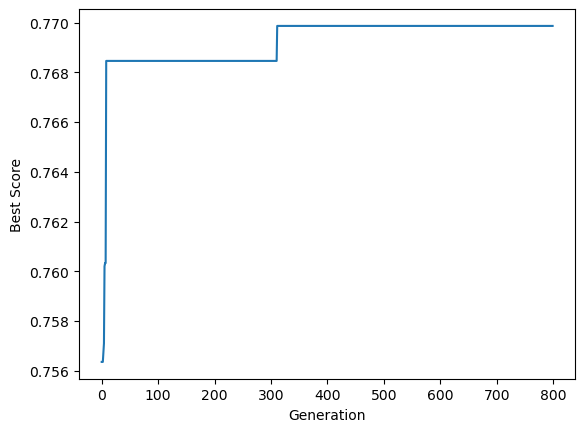

In [14]:
score_history = np.array(score_history)
print(f'Best Score : {best_score}')
print(f'Best Chromosome : {best_parent_chromosome}')
plt.plot(score_history[:, 0], score_history[:, 1])
plt.ylabel('Best Score')
plt.xlabel('Generation')
plt.show()